In [1]:
import ldd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy

[2.45+/-3.7496838136924796e-16]


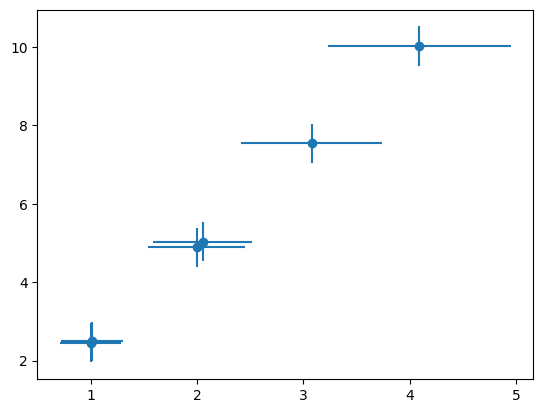

In [9]:
err = 0.1
position_emetteur = ufloat(0, std_dev=0)

# Protocole 1
position_recepteur_1 = unumpy.uarray([2.45, 5.03, 7.54], std_devs=err)

# Protocole 2
position_recepteur_fixe = ufloat(0, std_dev=0)
position_recepteur_mobile = unumpy.uarray([2.49, 4.89,10.02], std_devs=err)

# Script
distance_protocole_1 = np.abs(position_recepteur_1 - position_emetteur)
distance_protocole_2 = np.abs(position_recepteur_fixe - position_recepteur_mobile)

distance = np.concatenate((distance_protocole_1, distance_protocole_2))
distance = np.sort(distance)

n = distance / ufloat(np.min(distance).nominal_value, std_dev=err)

ldd.plot_error(n, distance, label="Valeurs expérimentales", fmt="o")

(a) = ldd.odr_fit(ldd.linear_function, n, distance, p0=[1])

print(a)